# Task 4: Introduction to Deep Learning with TensorFlow & Keras

## Section 1: Setup & Dataset

### **Task 1**: Import Dependencies and Load Data
*Instruction*: Use the MNIST dataset (handwritten digit classification). Load it from tf.keras.datasets and normalize the pixel values.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


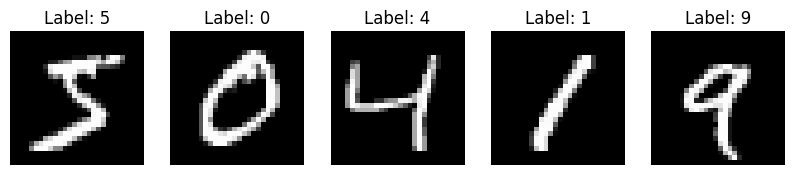

In [1]:
# Import dependencies
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Optionally, visualize the first 5 images in the training set
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

## Section 2: Data Exploration

### **Task 2**: Visualize Sample Images

*Instruction*: Plot the first 10 images with their corresponding labels.


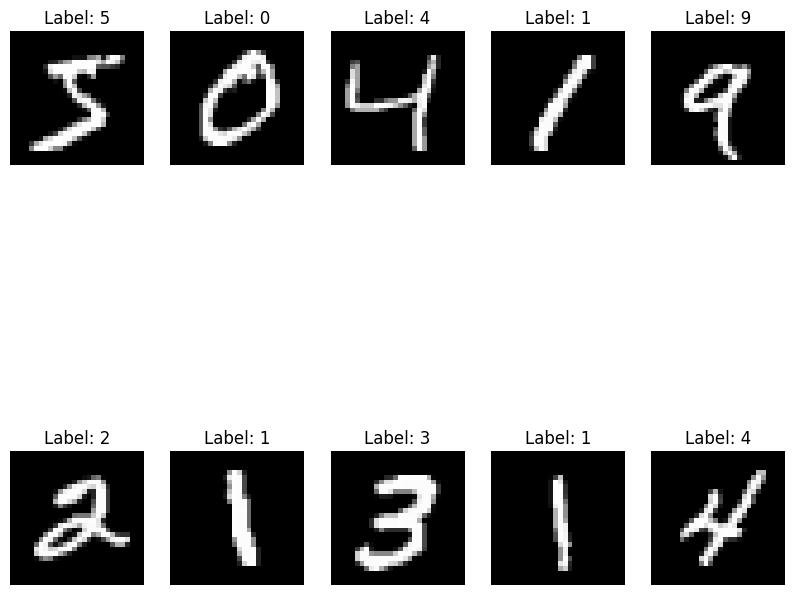

In [2]:
# Visualize the first 10 images with their corresponding labels
import matplotlib.pyplot as plt

# Set up the figure to display the images
plt.figure(figsize=(10, 10))

# Loop through the first 10 images
for i in range(10):
    plt.subplot(2, 5, i + 1)  # Create a 2x5 grid of subplots
    plt.imshow(X_train[i], cmap='gray')  # Display the image
    plt.title(f'Label: {y_train[i]}')    # Show the corresponding label
    plt.axis('off')                       # Hide the axis

# Show the plot
plt.show()

## Section 3: Build a Neural Network

### **Task 3**: Define a Simple MLP Model

*Instruction*: Use Keras to create a simple feedforward neural network with:


*   Input layer (flatten)
*   2 hidden layers (128, 64 neurons) with ReLU
*   Output layer with softmax


In [3]:
# Import necessary dependencies
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Define the MLP model
model = Sequential()

# Input layer: Flatten the 28x28 images into a 1D array
model.add(Flatten(input_shape=(28, 28)))

# Hidden layer 1: 128 neurons with ReLU activation
model.add(Dense(128, activation='relu'))

# Hidden layer 2: 64 neurons with ReLU activation
model.add(Dense(64, activation='relu'))

# Output layer: 10 neurons for 10 classes with softmax activation
model.add(Dense(10, activation='softmax'))

# Summary of the model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## Section 4: Compile & Train

### **Task 4**: Compile and Fit the Model

*Instruction*: Compile using `adam` optimizer and `sparse_categorical_crossentropy` as loss function. Train for 10 epochs.

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8800 - loss: 0.4127 - val_accuracy: 0.9611 - val_loss: 0.1207
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9685 - loss: 0.1058 - val_accuracy: 0.9717 - val_loss: 0.0920
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9787 - loss: 0.0683 - val_accuracy: 0.9761 - val_loss: 0.0731
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9840 - loss: 0.0499 - val_accuracy: 0.9729 - val_loss: 0.0837
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9874 - loss: 0.0403 - val_accuracy: 0.9786 - val_loss: 0.0722
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9906 - loss: 0.0285 - val_accuracy: 0.9760 - val_loss: 0.0821
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9920 - loss: 0.0243 - val_accuracy: 0.9737 - val_loss: 0.0974
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9922 - loss: 0.

## Section 5: Evaluate the Model

### **Task 5**:  Test Accuracy and Confusion Matrix

*Instruction*: Evaluate the model on the test set and print confusion matrix.


313/313 - 2s - 5ms/step - accuracy: 0.9776 - loss: 0.0877

Test accuracy: 0.9776
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


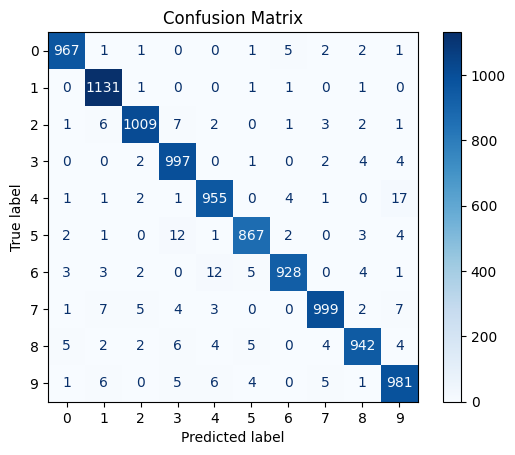

In [5]:
# Import necessary library for confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_accuracy:.4f}')

# Make predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Section 6: Plot Training History

### **Task 6**: Visualize Accuracy and Loss

*Instruction*: Plot training vs validation accuracy and loss over epochs.

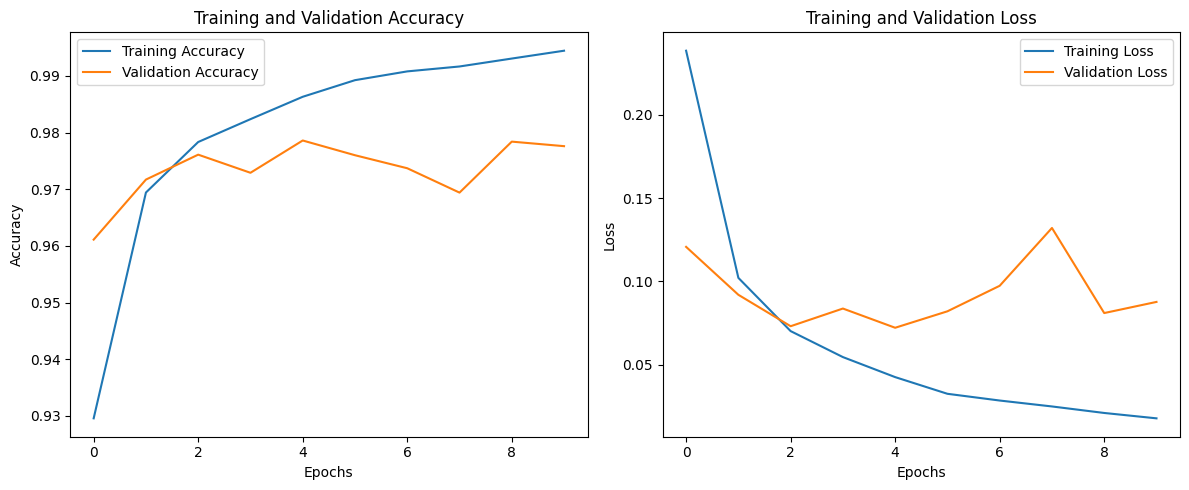

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

# Show the plots
plt.tight_layout()
plt.show()